In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from scipy.stats import norm

In [3]:
belize_df = pd.read_csv("belize_airbnb_listings.csv")

In [29]:
belize_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


### 1.	Why is assuming normal data an important consideration when answering questions about probability?

With normal distribution mean, mode and medium are all the same or close enough. 
This makes it easy for us to make any probability calculations as we chave to consider just two values mean and standard deviation.

### 2.	Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 

####    a.	How do you choose your bin size?

In [6]:
# Using Sturges' rule to calculate the number of bins for histogram

bin_count_rpm = int(np.ceil(np.log2(len(belize_df["reviews_per_month"]))) + 1)
bin_count_nor = int(np.ceil(np.log2(len(belize_df["number_of_reviews"]))) + 1)

print(bin_count_nor)
print(bin_count_rpm)

13
13


#### Bin size was selected using Sturges' Rule - 
Sturges’ Rule uses the following formula to determine the optimal number of bins to use in a histogram:

Optimal Bins = ⌈log2n + 1⌉

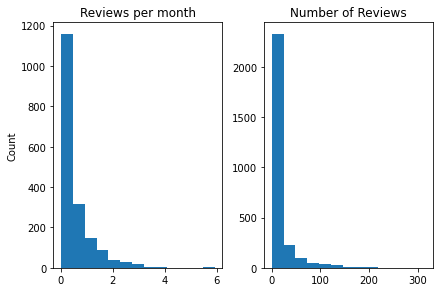

In [7]:
fig, ax = plt.subplots(1,2)
fig.tight_layout()

ax[0].hist(belize_df["reviews_per_month"],bins=bin_count_rpm)
ax[0].set_title("Reviews per month")
ax[0].set_ylabel("Count")

ax[1].hist(belize_df["number_of_reviews"],bins=bin_count_nor)
ax[1].set_title("Number of Reviews")

plt.show()

#### Observation : 
The data is right skewed. 

### 3.	Create a box and whisker plot for availability_365. What does this show you?

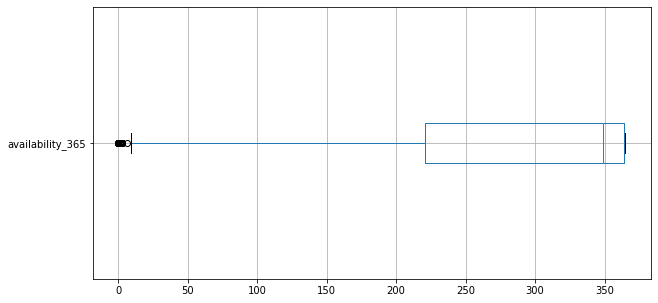

In [8]:
ax = belize_df[["availability_365"]].boxplot(vert=False,figsize=(10,5))

plt.show()

#### Obeservations:
    - Left skewed with outliers below the lower quarltile. 
    - Fromt this we can infer that most of the properties listed are available for the major portion of the years with few outliers where property in available for limited days in a year.

### 4.	What is the probability that the price for an Airbnb is under $50?    

In [19]:
# Calculating the probability using the cdf funtion of normal distribution 
norm.cdf(50,belize_df["price"].mean(),belize_df["price"].std())

0.29275508850857507

Probaility of an Airbnb price being under $50 is 29%

#### a. What do you notice about these records? Hint: look at the other columns.

In [10]:
belize_df[belize_df['price']<50][["neighbourhood_group","neighbourhood"]].value_counts()

neighbourhood_group  neighbourhood       
Cayo                 Cayo                    21
Belize               Belize Mainland         15
Stann Creek          Stann Creek Mainland     6
Belize               Belize Islands           4
Toledo               Toledo Mainland          2
Orange Walk          Orange Walk              1
dtype: int64

It loos like that most of the properties available for under $50 are from the neighbourhood of Cayo and Belize.

#### b. What distribution does this data most closely fit?

<AxesSubplot:>

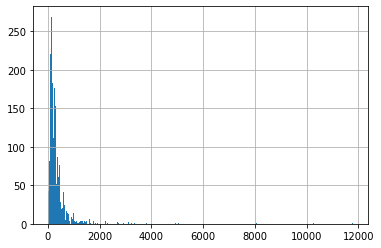

In [62]:
belize_df['price'].hist(bins=500)

Distribution for price most closely fits a discrete distributon like Poisson.

### 5.	Calculate the sample variance and standard deviation for all the numerical columns in the same output.  

In [26]:
# Using the agg funtion to calculate the standard deviation and sample variation. Agg funtion only give output for numerical data.
belize_df.agg([np.std,np.var])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632
var,1.661428e+14,1.036327e+16,0.288841,0.147361,317109.568066,32.147122,919.773508,0.438448,2674.046405,14548.613157


#### a.	Why sample variance and not population variance?

As this data is a sample data we would getter a better estimates using sample variance for the population data

#### b.	What is your takeaway for each metric?

Variance exhibits how spread out the data is. The larger the value the more spread out the data is. In this case 'price' is highly spread out while 'id' and 'host_id' have negligible variance indicating it's values are close to each other.
While standard deviation also tells us how spread out the data is but it's values gives the exact measure of spread from the mean. So for 'price' it stretched 563 units far from the mean. While the histance for 'host_id' and 'id' values from mean are neglibile. 

#### c.	What are the scales of measurement for each of these values? 

| Columns | Scale of Measurement | 
| --- | --- |
| id | Nominal Scale | 
|host_id| Nominal Scale |
|latitude| Interval scale |
|longitude| Interval scale |
|price| Interval Scale |
|minimum_nights| Ordinal Scale |
|number_of_reviews| Ordinal Scale |
|reviews_per_month| Ratio Scale |
|calculated_host_listings_count| Ordinal Scale |
|availability_365| Ordinal Scale |

Source: https://studyonline.unsw.edu.au/blog/types-of-data#The%20four%20scales%20of%20measurement

### 6.	What percent of Airbnb listings in Belize are available 360 days a year or more?

In [30]:
belize_df[belize_df['availability_365']>=360]['availability_365'].count()/belize_df['availability_365'].count() * 100

39.52074391988555

About 39.5 % of of listings are available fot 360 days or more. 

#### a.	360 days or less?

In [34]:
belize_df[belize_df['availability_365']<=360]['availability_365'].count()/belize_df['availability_365'].count() * 100

61.55221745350501

About 61.5 % of listing are avialble for 360 or less.

#### b.	What distribution does this data most closely fit?

<AxesSubplot:>

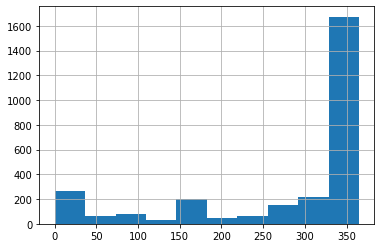

In [50]:
belize_df['availability_365'].hist()

This looks like a exponential distrubution with tail on right side. 

### 7.	What minimum night count are 75% of Airnbnb listing in Belize greater than?

In [54]:
# Calculating first quartile to answer the question
np.percentile(belize_df["minimum_nights"], 25)

1.0

75% of the listings has minimum night count as more than 1. 

#### Explain The Monty Hall problem in your notebook in markdown in under 250 words.

The problem is named after 'Let's make a deal' game show host Monty Hall. In the show the player is asked to choose between three doors out of which there is a car behind one of them. When the player choses a door, the host then opens one of the 2 unchosen doors to reveal a goat. Now the player has a choice to switch from chosen door to the other unopened door. Should the player switch? The probability answer to this is counter-intuitive.

| Door# 1 | Door# 2 | Door# 3 |
| --- | --- | --- |
| Stay (car) | Switch (goat) | Switch (goat) |
| Switch (goat) | Stay (car) | Switch (goat) |
| Switch (goat) | Switch (goat) | Stay (car) |

To start with all three doors have the probability 1/3 of winning a car. Say the player selects Door# 1. 
Host then reveals Door# 3 to be hiding a goat. 

What strategy will have better odds at winning a car. Staying with Door# 1 or switching to Door# 2?

From the above table we can see that overall probability for stay is 1/3(3 out of 9) while odds for switching are 2/3 (6 out of 9). Hence, counter-intuitive but switching will have better odds of winning the Car.

#### Completed DataCamp's Intro to Stats

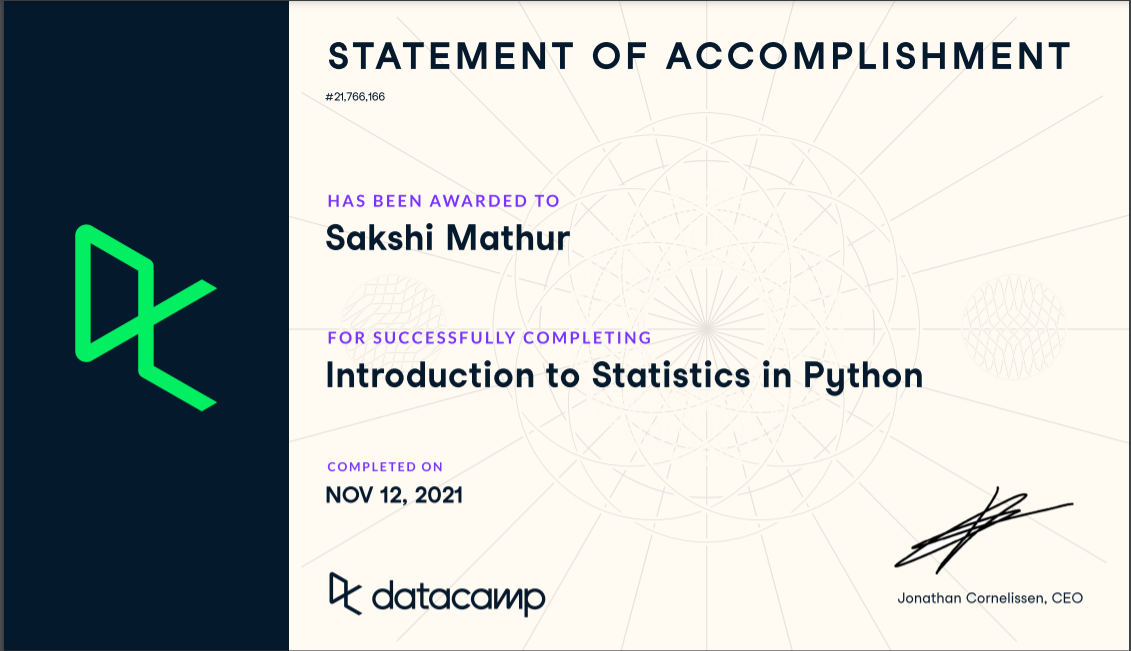